# Understanding Loss Function and Gradient Descent Method.

  - loss function / 損失関数
  - gradient descent method / 勾配降下法

## Step 0 : Preparation. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Select figure formats for the inline backend.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# Create train data./ 学習用データを生成
# The data is like a paired of height and weight. / 身長と体重をペアにしたようなデータ。
train1 = np.array([[166,58.7], [176,75.7], [171,62.1], [173,70.4], [169,60.1]])
display(train1)

array([[166. ,  58.7],
       [176. ,  75.7],
       [171. ,  62.1],
       [173. ,  70.4],
       [169. ,  60.1]])

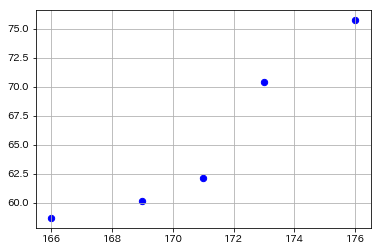

In [2]:
# Show the train data on the scatter chart. / 学習用データを散布図に表示
plt.scatter(train1[:,0], train1[:,1], s=40, c='b')
plt.grid()
plt.show()

## Step 1 : Normalize the array.
配列を正規化

### Calculate the average of each value. / それぞれの値の平均値の計算

In [3]:
mean = train1.mean(axis=0)
display(mean)

array([171. ,  65.4])

### Normalize by subtracting the average value from each value. / それぞれの値から平均値を引いて、正規化する。

In [4]:
train2 = train1 - mean
display(train2)

array([[-5. , -6.7],
       [ 5. , 10.3],
       [ 0. , -3.3],
       [ 2. ,  5. ],
       [-2. , -5.3]])

### Show on a scatter chart. / 散布図上に表示

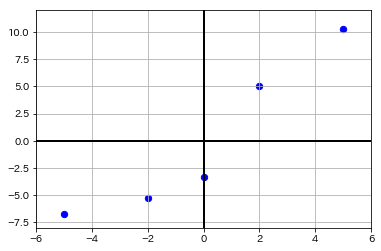

In [5]:
plt.scatter(train2[:,0], train2[:,1], s=40, c='b')
plt.plot([-6,6],[0,0], lw=2, c='k')
plt.plot([0,0],[-8,12], lw=2, c='k')
plt.xlim(-6,6)
plt.ylim(-8,12)
plt.grid()
plt.show()

## Step 2 : Linear single regression analysis
説明変数xから、目的変数yを求める単回帰分析を行う。

Derive an equation that finds the value of ***y*** close to the correct answer by finding the inner product of the two vectors ***w*** and ***x***. / 
***w***と***x***の2つのベクトルの内積を求めることで、正解に近い***y***の値が求まるような式の導出。

$$
    \boldsymbol{w} =
        \left[\begin{array}{c}
            w0 \\
            w1 \\
        \end{array}\right] \quad
    \boldsymbol{x} =
        \left[\begin{array}{c}
            1 \\
            x \\
        \end{array}\right] \quad
$$

$$
    \boldsymbol{y} = \boldsymbol{w} \cdot \boldsymbol{x} =
        \left[\begin{array}{c}
            w0 \\
            w1 \\
        \end{array}\right] \cdot
        \left[\begin{array}{c}
            1 \\
            x \\
        \end{array}\right] =
            \boldsymbol{w0} + \boldsymbol{w1x}
$$




### Create a list of explanatory variable vector ***x***. / 説明変数ベクトル***x***のリストを作成 

In [6]:
x_tmp = train2[:,0:1]
x_array = np.insert(x_tmp, 0, 1.0, axis=1)

display(x_tmp)
display(x_tmp.shape)
display(x_array)
display(x_array.shape)

array([[-5.],
       [ 5.],
       [ 0.],
       [ 2.],
       [-2.]])

(5, 1)

array([[ 1., -5.],
       [ 1.,  5.],
       [ 1.,  0.],
       [ 1.,  2.],
       [ 1., -2.]])

(5, 2)

### Create a list of correct values (objective variables) ***y***. / 正解値(目的変数)***y***のリストを作成

In [7]:
yt = train2[:,1]
display(yt)

array([-6.7, 10.3, -3.3,  5. , -5.3])

### Initialize vaiables. / 変数を初期化

In [8]:
# Total number of x in the x_array. / xの総数 (=5)
M  = x_array.shape[0]

# Number of x dimension. / xの次元数(=2)
D = x_array.shape[1]

# Iteration count. / 繰り返し回数
iters = 200

# Learning rate. / 学習率
alpha = 0.01 

# Initial value of the weight vector.(arbitrary value) / 重みベクトルの初期値 (任意の値)
w = np.array([2, -1])

# For recording evaluation results (Iteration No, Loss function values, w0, w1) / 評価結果記録用 (繰り返し番号, 損失関数値, w0, w1を記録)
history = np.zeros((0,4))

### Execute gradient descent method and calcurate loss function value. / 勾配降下法を実行し、欠損間数値を計算する

  - Loss function / 欠損関数
      - Calculate the mean of error sum of squares so that the number of loss functions does not change by the number of training data. / 学習データの数によって欠損関数の数が変わらないように、2乗和の平均を計算。
      - Divide the mean value by 2 to simplify the result of the differential calculation. / 微分計算の結果を簡単にするため2で割る。

$$
    \begin{align}
        &yp = x^{(m)} \cdot w \\
        &yd = yp^{(m)} - yt^{(m)} \\
        &L = \frac{1}{2M} \sum_{m=0}^{M}(yd^{(m)})^{2}
    \end{align}
$$

  - Gradient descent method / 勾配降下法
      - Partial derivative of the loss function with respect to w0 and w1. / 欠損関数をw0、w1で偏微分する。
  
$$
    \begin{align}
        &Lw0 = \frac{1}{M} \sum_{m=0}^{M} 1 \cdot yd^{(m)} \\
        &Lw1 = \frac{1}{M} \sum_{m=0}^{M} x^{(m)} \cdot yd^{(m)}
    \end{align}
$$    


In [9]:
for i in range(iters):
    
    # Calculate predicted value using inner product. / 内積を使った予測値の計算
    # e.g. yp = [-9.09863826e+00  9.10825829e+00  4.81001858e-03  3.64618933e+00 -3.63656929e+00]
    yp = x_array @ w
    
    # Calculate difference between predicted value and correnct values. / 誤差の計算
    # e.g. yd = [-2.40280383 -1.19590728  3.30064444 -1.35797624  1.65926513]
    yd = yp - yt
    
    # Execute gradient descent method. / 勾配降下法の実装
    # e.g. w = [1.14524580e-05 1.82068966e+00]
    # "numpy.matrix.T" returns the transpose of the matrix. / .Tは転置行列を返す。
    w = w - alpha * (x_array.T @ yd) / M
    
    # Store data for learning curve. / 学習曲線描画用データの保存
    L = np.mean(yd ** 2) / 2 # Loss function value.
    w0 = float(w[0])
    w1 = float(w[1])
    line = np.array([i, L, w0, w1])
    history = np.vstack((history, line))

# Set number of digits of precision for floating point output. / 浮動小数点の表示有効桁数を設定
np.set_printoptions(precision=3)
display(history[:5])
display(history[-1:])

array([[ 0.   , 50.416,  1.98 , -0.673],
       [ 1.   , 40.291,  1.96 , -0.384],
       [ 2.   , 32.371,  1.941, -0.128],
       [ 3.   , 26.174,  1.921,  0.098],
       [ 4.   , 21.324,  1.902,  0.298]])

array([[199.   ,   2.306,   0.268,   1.821]])

### Show learning curve. / 学習曲線を表示

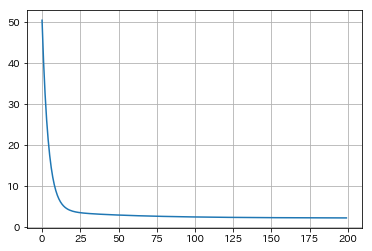

In [10]:
plt.plot(history[:,0], history[:,1])
plt.grid()
plt.show()

## Step 3 : Create an animation.

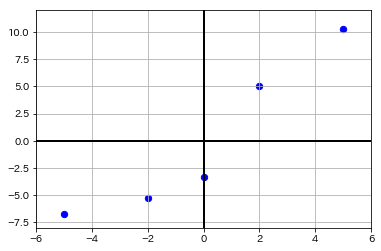

In [11]:
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()

# Range of x and y axis.
ax.set_xlim(( -6, 6))
ax.set_ylim((-8, 12))

# Draw only the frame of the chart.
ax.plot([-6,6],[0,0], lw=2, c='k')
ax.plot([0,0],[-8,12],lw=2, c='k')
ax.grid()
ax.scatter(train2[:,0], train2[:,1], s=40, c='b')
line, = ax.plot([], [], lw=2)

In [12]:
X0 = np.array([-6,6])
X1 = np.array([[1, -6],[1, 6]])

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    l = history[i,:]
    W = l[2:]
    L = float(l[1])
    w0 = float(l[2])
    w1 = float(l[3])
    Y = X1 @ W
    line.set_data(X0, Y)
    title = 'i = %3d  w0 = %6.3f w1 = %6.3f L = %6.3f' % (i, w0, w1, L)
    ax.set_title(title)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=100, blit=True, repeat=True)

HTML(anim.to_html5_video())

## Step 4 : Create linear regression model using Scikit-learn library.
Scikit-learnのライブラリを使って線形回帰モデルを作成

In [13]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

# Create prediction model. / 予測モデルを作成
clf.fit(x_tmp, yt)

# Get y-intercept and inclenation. / 切片と傾きの取得
W0 = clf.intercept_
W1 = clf.coef_

# Compare values.
print('Result from Step 2 :  w0 = %6.2f / w1 = %6.2f' % (w0, w1))
print('Result from Step 4 :  w0 = %6.2f / w1 = %6.2f' % (W0, W1))

Result from Step 2 :  w0 =   0.27 / w1 =   1.82
Result from Step 4 :  w0 =  -0.00 / w1 =   1.82
